In [117]:
import pandas as pd

raw_train_data = pd.read_csv('train.csv')

In [118]:
'''
column_list:
- column0: frequency of sample in the row
- column1: positive sample number in the row
return:
- column1: True(positive) or False(negative) of sample
- column0: 'Index', unique index of the row
'''
def expand_sample(df, columns):
    freq_label, pos_label = columns[0], columns[1]
    df['Index'] = df.index
    df = df.loc[:, [freq_label, pos_label, 'Index']]
    expanded = []
    for row_tup in df.iterrows():
        row = row_tup[1]
        freq, pos, index = int(row[0]), int(row[1]), row[2]
        # positive sample
        expanded.extend([[1, index] for i in range(pos)])
        # negative sample
        expanded.extend([[0, index] for i in range(freq - pos)])
        
    return pd.DataFrame(data=expanded, columns=[pos_label, 'Index'])

In [119]:
def join_property(df, raw, columns):
    raw['Index'] = raw.index
    joined_df = pd.merge(df, raw.loc[:, columns+['Index']], on='Index', how='left')
    joined_df = joined_df.drop(['Index'], axis=1)
    return joined_df

In [120]:
raw_train_data.head(10)

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5  2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6  2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9  2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   
5          CULEX RESTUANS     15    W WEBSTER AVE  T045   
6          CULEX RESTUANS     25      W GRAND AVE  T046   
7  CULEX PIPIENS/RESTUANS     11      W ROOSEVELT  T048   
8          CULEX RESTUANS     11      W ROOSEVELT  T048   
9          CULEX RESTUANS     11        W CHICAGO  T049   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
5   1500  W WEBSTER AVE, Chicago, IL  41.921600 -87.666455                8   
6     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491                8   
7     1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
8     1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
9       1100  W CHICAGO, Chicago, IL  41.896282 -87.655232                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0  
5             2           0  
6             1           0  
7             1           0  
8             2           0  
9             1           0

In [121]:
expanded = expand_sample(raw_train_data, ['NumMosquitos', 'WnvPresent'])
expanded.head(10)

WnvPresent  Index
0           0      0
1           0      1
2           0      2
3           0      3
4           0      4
5           0      4
6           0      4
7           0      4
8           0      5
9           0      5

In [122]:
expanded_df = join_property(expanded, raw_train_data, ['Latitude', 'Longitude'])
expanded_df.head(10)

WnvPresent   Latitude  Longitude
0           0  41.954690 -87.800991
1           0  41.954690 -87.800991
2           0  41.994991 -87.769279
3           0  41.974089 -87.824812
4           0  41.974089 -87.824812
5           0  41.974089 -87.824812
6           0  41.974089 -87.824812
7           0  41.974089 -87.824812
8           0  41.921600 -87.666455
9           0  41.921600 -87.666455

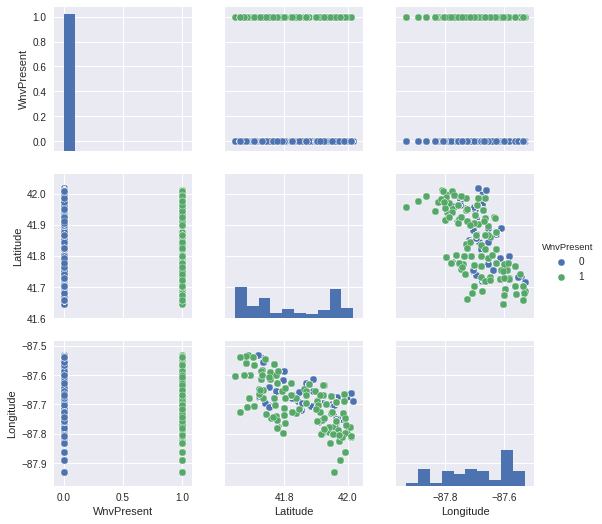

In [123]:
import seaborn as sns
sns.pairplot(expanded_df, hue = 'WnvPresent')
from sklearn import svm
sns.plt.show()

In [126]:
# http://may46onez.hatenablog.com/entry/2016/02/19/152532
from sklearn import svm
train_location = expanded_df.loc[:,['Latitude', 'Longitude']].values.tolist()
train_label = expanded_df['WnvPresent'].tolist()

clf = svm.SVC()
clf.fit(train_location, train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
raw_test_data = pd.read_csv('test.csv')

test_location = raw_test_data.loc[:,['Latitude', 'Longitude']]
test_pred = clf.predict(test_location.values.tolist())

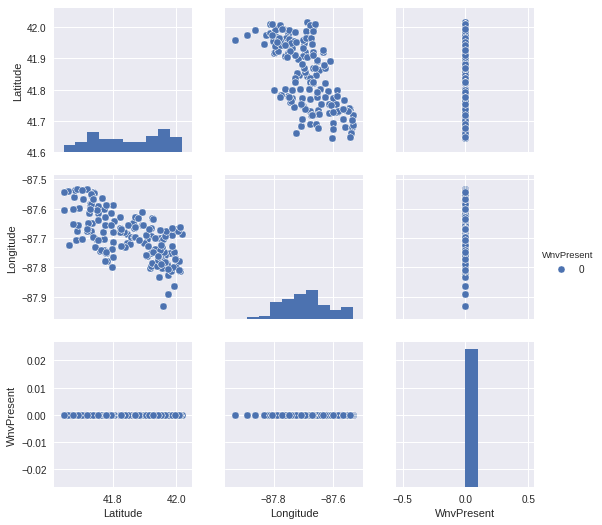

In [131]:
test_location['WnvPresent'] = test_pred
sns.pairplot(test_location, hue = 'WnvPresent')
sns.plt.show()